<a href="https://colab.research.google.com/github/ashleyferreiraa/Big-Data-Analytics-project/blob/main/Data_Analytics_Project_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the working data set

Add the 3 economic factors data sets :

1. GDP
2. Mortgage Rates
3. Unemployment rates


Download,load and preprocess the **Gross Domestic Porduct (GDP) / capita data**

In [6]:
import pandas as pd

file_path='/content/GDP.csv'
GDP= pd.read_csv(file_path)

GDP= GDP[GDP['Country Name'] == 'Canada']

GDP= GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Country Name'])

# Transpose the DataFrame
GDP_transposed = GDP.T.reset_index()

# Rename the columns to 'Year' and 'GDP'
GDP_transposed.columns = ['Year', 'GDP']

#remove the first row
GDP_transposed = GDP_transposed.iloc[1:]
#remove the last row
GDP_transposed= GDP_transposed[:-1]

print(GDP_transposed.head())

   Year          GDP
1  1961  2246.083566
2  1962  2274.428471
3  1963  2380.317329
4  1964  2561.638491
5  1965  2777.183173


Download,load and preprocess the **Mortgage Rates data**

In [7]:
import pandas as pd

file_path='/content/Mortgage Rates.csv'
mortgage_rates= pd.read_csv(file_path)

# Drop unnecessary columns
mortgage_rates= mortgage_rates.drop(columns=['Conventional mortgage - 1-year', 'Conventional mortgage - 3-year', 'Prime rate'])

# Convert 'date' column to datetime
mortgage_rates['date'] = pd.to_datetime(mortgage_rates['date'])

# Extract the year from the 'date' column
mortgage_rates['Year'] = mortgage_rates['date'].dt.year

# Group data by year and calculate the mean value for each year
mortgage_rates = mortgage_rates.groupby('Year')['Conventional mortgage - 5-year'].mean()

# Rename the mortgage rate column
mortgage_rates = mortgage_rates.rename("Mortgage rate")

# Reset index to make 'Year' a regular column
mortgage_rates = mortgage_rates.reset_index()

print(mortgage_rates.head())



   Year  Mortgage rate
0  1975      11.377358
1  1976      11.817308
2  1977      10.298077
3  1978      10.490385
4  1979      12.052885


Download,load and preprocess the **unemployment rates data**



In [8]:
import pandas as pd

file_path='/content/Unemployment Rates.csv'
unemployment_rates= pd.read_csv(file_path)


# Filter unemployment_rates for Canada ONLY
canada_unemployment = unemployment_rates[unemployment_rates['GEO'] == 'Canada']

#Select only the desired columns
canada_unemployment = canada_unemployment[['REF_DATE', 'GEO', 'VALUE']]

#get only yearly unemployment rate values

#Turn RED_DATE to date time
canada_unemployment['REF_DATE'] = pd.to_datetime(canada_unemployment['REF_DATE'])

# Extract the year from the 'REF_DATE' column
canada_unemployment['Year'] = canada_unemployment['REF_DATE'].dt.year

# Group data by year and calculate the mean value for each year
yearly_unemployment = canada_unemployment.groupby('Year')['VALUE'].mean()

yearly_unemployment = yearly_unemployment.rename("Unemployment rate")

# Reset the index to make 'Year' a regular column
yearly_unemployment = yearly_unemployment.reset_index()


print(yearly_unemployment.head())


   Year  Unemployment rate
0  1976           3.650382
1  1977           4.189545
2  1978           4.430369
3  1979           3.897901
4  1980           3.880271


Download,load, and preprocess the *target variable* - **New housing price index (NHPI) data**

In [11]:
import pandas as pd

file_path='/content/NHPI.csv'
NHPI_data= pd.read_csv(file_path)


# Filter for Canada and Total (house and land)
NHPI_data = NHPI_data[(NHPI_data['GEO'] == 'Canada') & (NHPI_data['New housing price indexes'] == 'Total (house and land)')]

# Keep only the 'REF_DATE' and 'VALUE' columns
NHPI_data = NHPI_data[['REF_DATE', 'VALUE']]

#get only yearly values

#Turn RED_DATE to date time
NHPI_data['REF_DATE'] = pd.to_datetime(NHPI_data['REF_DATE'])

# Extract the year from the 'REF_DATE' column
NHPI_data['Year'] = NHPI_data['REF_DATE'].dt.year

# Group data by year and calculate the mean value for each year
NHPI_data = NHPI_data.groupby('Year')['VALUE'].mean()

NHPI_data = NHPI_data.rename("NHPI")

# Reset the index to make 'Year' a regular column
NHPI_data = NHPI_data.reset_index()

print(NHPI_data.head())


   Year       NHPI
0  1981  40.008333
1  1982  39.158333
2  1983  37.875000
3  1984  38.016667
4  1985  38.475000


Combine all 3 data sets - aligned at the same year

In [12]:
# Merge the dataframes
merged_data = pd.merge(NHPI_data, yearly_unemployment, on='Year', how='inner')
merged_data = pd.merge(merged_data, mortgage_rates, on='Year', how='inner')

# Convert 'Year' column to int before merging
GDP_transposed['Year'] = GDP_transposed['Year'].astype(int)
merged_data= pd.merge(merged_data, GDP_transposed, on='Year', how='inner')

print(merged_data.head())

   Year       NHPI  Unemployment rate  Mortgage rate          GDP
0  1981  40.008333           3.891040      18.350962  12379.03686
1  1982  39.158333           5.777962      18.149038  12527.31353
2  1983  37.875000           6.733969      13.283654  13477.10317
3  1984  38.016667           6.342140      13.596154  13930.47455
4  1985  38.475000           6.026463      12.168269  14170.12494


In [84]:

# Check for missing values in the merged dataset
print(merged_data.isnull().sum())

# Check data types of each column
merged_data.dtypes


Year                 0
NHPI                 0
Unemployment rate    0
Mortgage rate        0
GDP                  0
dtype: int64


,0
Year,int32
NHPI,float64
Unemployment rate,float64
Mortgage rate,float64
GDP,float64


In [85]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42 non-null     int32  
 1   NHPI               42 non-null     float64
 2   Unemployment rate  42 non-null     float64
 3   Mortgage rate      42 non-null     float64
 4   GDP                42 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.6 KB


# Exploratory Data Analysis

                       NHPI  Unemployment rate  Mortgage rate       GDP
NHPI               1.000000           0.110481      -0.793074  0.955736
Unemployment rate  0.110481           1.000000      -0.408373  0.134193
Mortgage rate     -0.793074          -0.408373       1.000000 -0.800903
GDP                0.955736           0.134193      -0.800903  1.000000


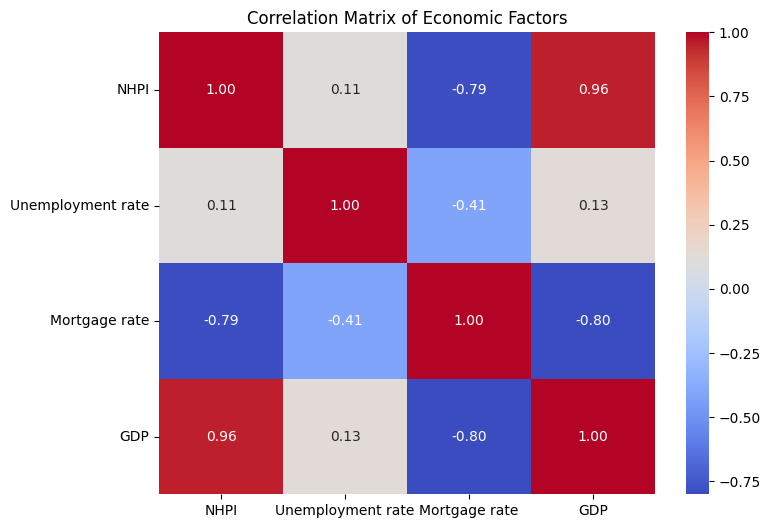

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = merged_data.drop(columns=['Year']).corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Factors')
plt.show()


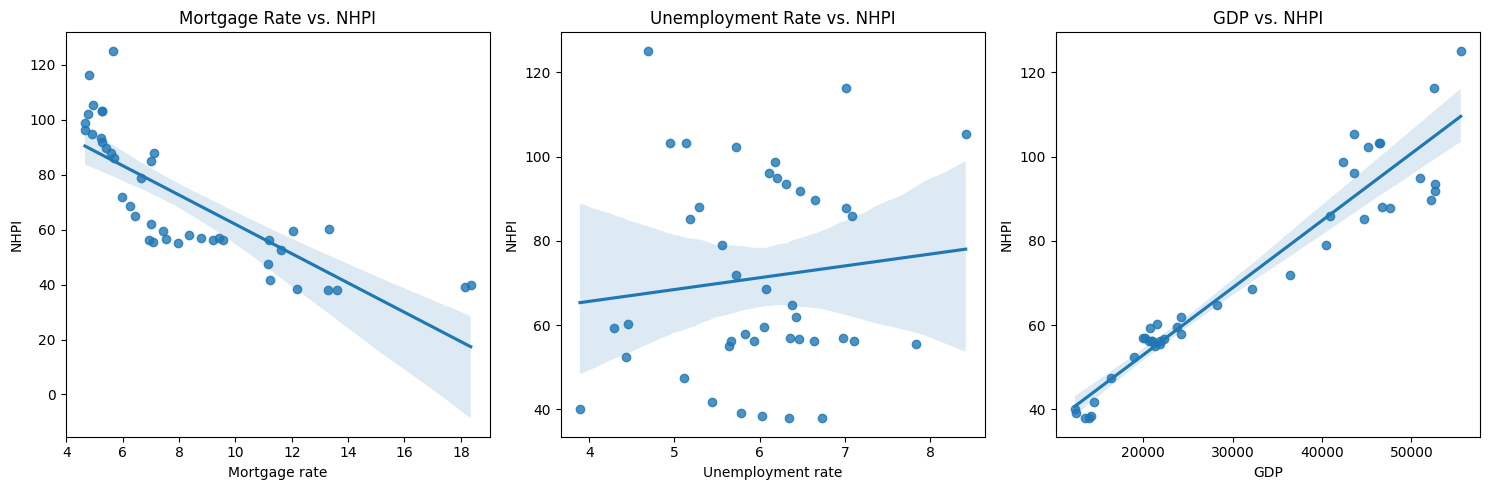

In [17]:

# Create scatter plots and regression lines
plt.figure(figsize=(15, 5))

# Mortgage Rate vs. NHPI
plt.subplot(1, 3, 1)
sns.regplot(x='Mortgage rate', y='NHPI', data=merged_data)
plt.title('Mortgage Rate vs. NHPI')

# Unemployment Rate vs. NHPI
plt.subplot(1, 3, 2)
sns.regplot(x='Unemployment rate', y='NHPI', data=merged_data)
plt.title('Unemployment Rate vs. NHPI')

# GDP vs. NHPI
plt.subplot(1, 3, 3)
sns.regplot(x='GDP', y='NHPI', data=merged_data)
plt.title('GDP vs. NHPI')

plt.tight_layout()
plt.show()


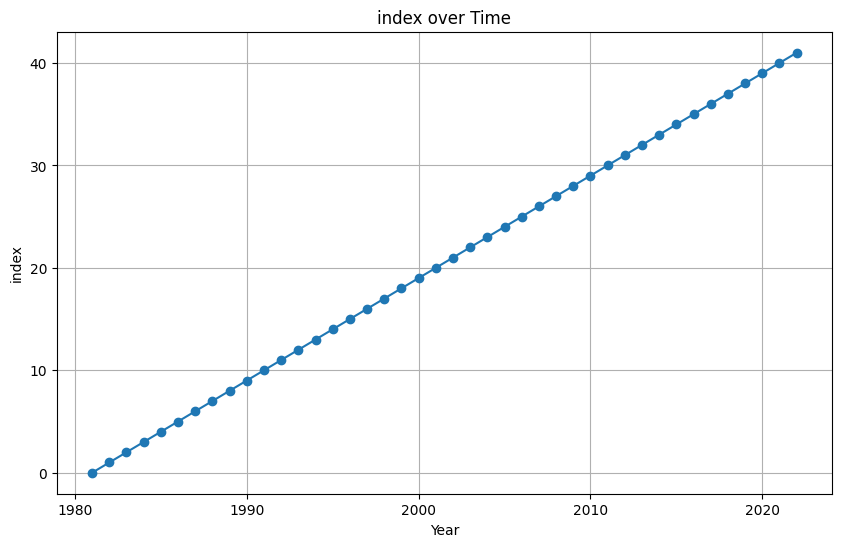

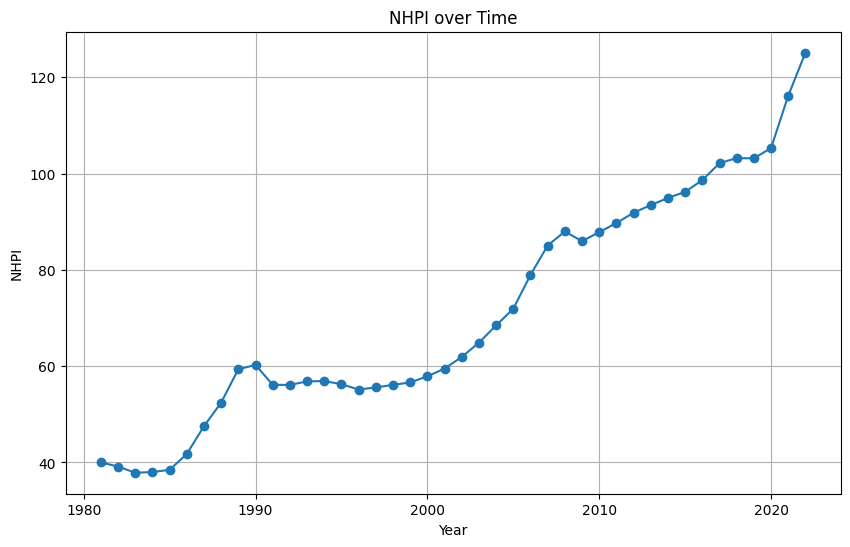

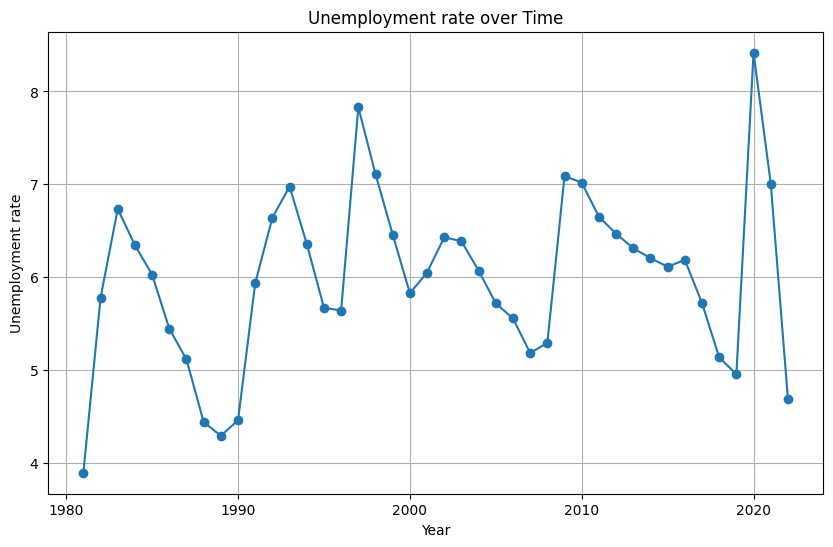

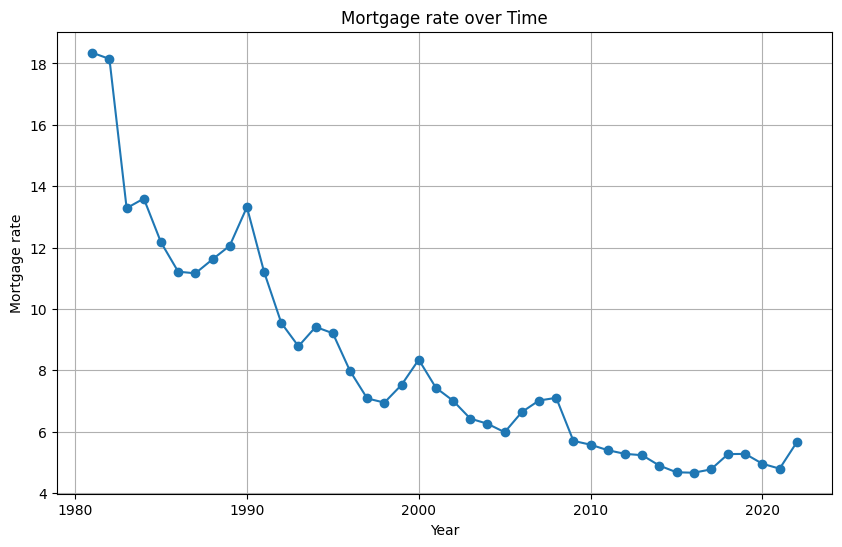

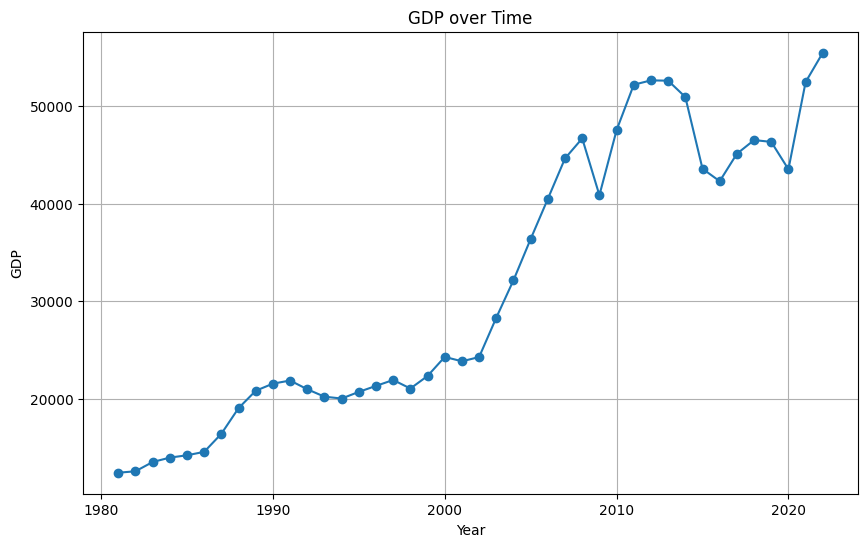

In [19]:

for column in merged_data.columns:
  if column != 'Year':  # Skip the 'Year' column itself
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data[column], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} over Time')
    plt.grid(True)
    plt.show()


# Model Comparison: Random Forest & ARIMAX

Random Forest

In [92]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for the model
X = merged_data.drop(columns=['NHPI'])  # Features (all columns except 'Year' and 'NHPI')
y = merged_data['NHPI']  # Target variable ('NHPI')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust the number of estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.606138250000022
R-squared: 0.9784138674427942


ARIMAX

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

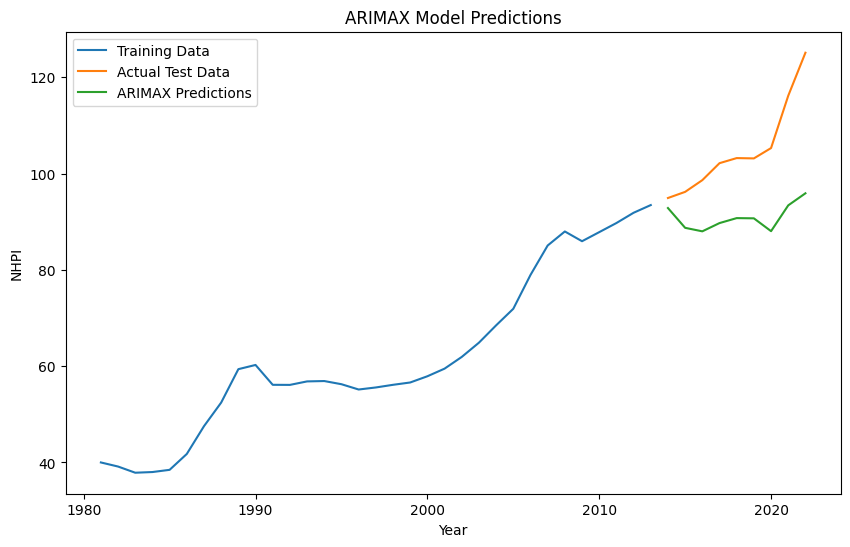

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for ARIMAX
merged_data = merged_data.reset_index()  # Reset the index if previously set
merged_data = merged_data.set_index('Year')  # Set 'Year' as the index

# Define the exogenous variables
exog_vars = ['Unemployment rate', 'Mortgage rate', 'GDP']
exog = merged_data[exog_vars]

# Standardize exogenous variables
scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog)

# Split the data into training and testing sets
train_data = merged_data[:-9]  # Use data up to the last 9 observations for training
test_data = merged_data[-9:]   # Use the last 9 observations for testing

exog_train_scaled = exog_scaled[:-9]
exog_test_scaled = exog_scaled[-9:]

# Fit the ARIMAX model with standardized exogenous variables
model = SARIMAX(train_data['NHPI'], exog=exog_train_scaled, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(merged_data)-1, exog=exog_test_scaled)

# Align predictions index with test_data index to fix x-axis misalignment
predictions.index = test_data.index

# Plot the results with correct alignment
plt.figure(figsize=(10, 6))
plt.plot(train_data['NHPI'], label='Training Data')
plt.plot(test_data['NHPI'], label='Actual Test Data')
plt.plot(predictions, label='ARIMAX Predictions')
plt.legend()
plt.title('ARIMAX Model Predictions')
plt.xlabel('Year')
plt.ylabel('NHPI')
plt.show()

Comparing the models

In [94]:


# Evaluate the ARIMAX model
arimax_mse = mean_squared_error(test_data['NHPI'], predictions)
arimax_r2 = r2_score(test_data['NHPI'], predictions)

print(f"\nARIMAX Model:")
print(f"Mean Squared Error: {arimax_mse}")
print(f"R-squared: {arimax_r2}")

print("\nModel Comparison:")
print(f"{'Model':<15} {'MSE':<10} {'R-squared':<10}")
print(f"{'Random Forest':<15} {mse:<10.2f} {r2:<10.2f}")
print(f"{'ARIMAX':<15} {arimax_mse:<10.2f} {arimax_r2:<10.2f}")



ARIMAX Model:
Mean Squared Error: 256.3470468285959
R-squared: -2.0239515583598346

Model Comparison:
Model           MSE        R-squared 
Random Forest   8.61       0.98      
ARIMAX          256.35     -2.02     


# Predicting NHPI for outyear



In [89]:
# Merge the dataframes
merged_data = pd.merge(NHPI_data, yearly_unemployment, on='Year', how='inner')
merged_data = pd.merge(merged_data, mortgage_rates, on='Year', how='inner')

# Convert 'Year' column to int before merging
GDP_transposed['Year'] = GDP_transposed['Year'].astype(int)
merged_data= pd.merge(merged_data, GDP_transposed, on='Year', how='inner')

print(merged_data.tail())

    Year        NHPI  Unemployment rate  Mortgage rate          GDP
37  2018  103.225000           5.134042       5.265000  46539.17616
38  2019  103.158333           4.952130       5.270769  46352.86934
39  2020  105.308333           8.417576       4.949434  43537.83930
40  2021  116.175000           7.007870       4.790000  52496.84417
41  2022  125.108333           4.687379       5.651538  55509.39318


Since Random Forest had a better Accuracy (Lower MSE) and stronger Model Fit (Higher R²) Random Forest model will be used to predict NHPI for the outyear 2023

In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to forecast features using Random Forest for a single year
def forecast_feature_rf_single_year(data, target_feature, forecast_year=2023):
    # Prepare dataset
    data = data.reset_index()  # Reset index to make 'Year' a column
    features = data.drop(columns=['Year', target_feature]).columns
    X = data[features]
    y = data[target_feature]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)

    # Create DataFrame for future prediction with initial values
    future_data = pd.DataFrame(index=[forecast_year], columns=data.columns)
    future_data['Year'] = forecast_year

    # Initialize future data with last known values from historical data
    for feature in features:
        future_data.loc[forecast_year, feature] = data.iloc[-1][feature]

    # Predict target feature for the forecast year
    future_data.loc[forecast_year, target_feature] = rf_model.predict(future_data.loc[[forecast_year]][features])[0]

    return future_data[[target_feature]]

# Forecast exogenous variables for 2023
predicted_unemployment_2023 = forecast_feature_rf_single_year(merged_data, 'Unemployment rate')
predicted_mortgage_2023 = forecast_feature_rf_single_year(merged_data, 'Mortgage rate')
predicted_gdp_2023 = forecast_feature_rf_single_year(merged_data, 'GDP')

# Combine forecasted exogenous variables for 2023
future_exog_2023 = pd.concat([predicted_unemployment_2023, predicted_mortgage_2023, predicted_gdp_2023], axis=1)
future_exog_2023['Year'] = future_exog_2023.index  # Add 'Year' column

# Prepare data for NHPI prediction for 2023
X_future_2023 = future_exog_2023[['Unemployment rate', 'Mortgage rate', 'GDP']]

# Predict NHPI for 2023 using the trained Random Forest model (rf_model from previous code)
predicted_nhpi_2023 = rf_model.predict(X_future_2023)

# Create DataFrame for predicted NHPI for 2023
predicted_nhpi_df_2023 = pd.DataFrame({'Year': future_exog_2023['Year'], 'Predicted NHPI': predicted_nhpi_2023})

# Print the predicted NHPI for 2023
print(predicted_nhpi_df_2023)


      Year  Predicted NHPI
2023  2023       99.699458


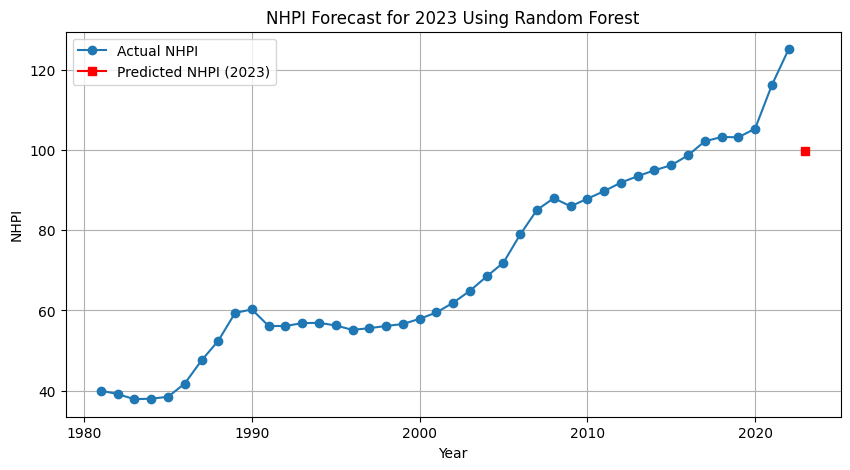

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Year'], merged_data['NHPI'], label='Actual NHPI', marker='o')
plt.plot(predicted_nhpi_df_2023['Year'], predicted_nhpi_df_2023['Predicted NHPI'], label='Predicted NHPI (2023)', marker='s', color='red')
plt.xlabel("Year")
plt.ylabel("NHPI")
plt.title("NHPI Forecast for 2023 Using Random Forest")
plt.legend()
plt.grid()
plt.show()